In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

The Ames Housing Dataset contains 2,919 observations of housing sales in Ames, Iowa between 2006 and 2010.

There are continuous (numerical), discrete (numerical), nominal (categorical), and ordinal (categorical) features describing each house’s size, quality, area, age, and other miscellaneous attributes.

## Load Datasets

In [3]:
#Load Datasets
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
y_test=pd.read_csv('./data/sample_submission.csv')

In [4]:
#Modify set_option to see all rows and columns
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('max_rows', 3000)
pd.set_option('max_columns', 300)
pd.set_option('max_colwidth', 80)

In [5]:
#Take a look at train, y_train, test, y_test
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     196.000        Gd        TA      PConc       Gd       TA           No   
1       0.000        TA        TA     CBlock       Gd       TA           Gd   
2     162.000        Gd        TA      PConc       Gd       TA           Mn   
3       0.000        TA        TA     BrkTil       TA       Gd           No   
4     350.000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
y_train=train['SalePrice']
y_train.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [7]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH       80.000    11622   Pave   NaN      Reg   
1  1462          20       RL       81.000    14267   Pave   NaN      IR1   
2  1463          60       RL       74.000    13830   Pave   NaN      IR1   
3  1464          60       RL       78.000     9978   Pave   NaN      IR1   
4  1465         120       RL       43.000     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       0.000        TA        TA     CBlock       TA       TA           No   
1     108.000        TA        TA     CBlock       TA       TA           No   
2       0.000        TA        TA      PConc       Gd       TA           No   
3      20.000        TA        TA      PConc       TA       TA           No   
4       0.000        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec     468.000          LwQ     144.000    270.000      882.000   
1          ALQ     923.000          Unf       0.000    406.000     1329.000   
2          GLQ     791.000          Unf       0.000    137.000      928.000   
3          GLQ     602.000          Unf       0.000    324.000      926.000   
4          ALQ     263.000          Unf       0.000   1017.000     1280.000   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896         0.000         0.000         1         0             2   
1       1329         0.000         0.000         1         1             3   
2       1629         0.000         0.000         2         1             3   
3       1604         0.000         0.000         2         1             3   
4       1280         0.000         0.000         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [8]:
y_test.head()

Id  SalePrice
0  1461 169277.052
1  1462 187758.394
2  1463 183583.684
3  1464 179317.478
4  1465 150730.080

In [9]:
list(train.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [10]:
#Drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [11]:
#train contain SalePrice column but test doesn't have that one
print('There area %d observations and %d columns with different characteristics in test'%(train.shape[0], train.shape[1]))
print('There area %d observations and %d columns with different characteristics in test'%(test.shape[0], test.shape[1]))

There area 1460 observations and 80 columns with different characteristics in test
There area 1459 observations and 79 columns with different characteristics in test


In [12]:
#Create in test a column called SalePrice and fill it with 0
#Now train and test have the same number of columns
test['SalePrice'] = 0
print('There area %d observations and %d columns with different characteristics in test'%(train.shape[0], train.shape[1]))
print('There area %d observations and %d columns with different characteristics in test'%(test.shape[0], test.shape[1]))

There area 1460 observations and 80 columns with different characteristics in test
There area 1459 observations and 80 columns with different characteristics in test


In [13]:
#Rename columns that begin for a number

train.rename(columns={'1stFlrSF':'FstFlrSF'}, inplace=True)
test.rename(columns={'1stFlrSF':'FstFlrSF'}, inplace=True)

train.rename(columns={'2ndFlrSF':'SndFlrSF'}, inplace=True)
test.rename(columns={'2ndFlrSF':'SndFlrSF'}, inplace=True)

train.rename(columns={'3SsnPorch':'TSsnPorch'}, inplace=True)
test.rename(columns={'3SsnPorch':'TSsnPorch'}, inplace=True)

## Exploratory Data Analysis (EDA)

In [14]:
#Create a DataFrame with information train
def info_data(df): 
    observ = df.shape[0]

    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    nulls = df.apply(lambda x: x.isnull().sum())
    missing_ratio = (df.isnull().sum()/ observ) * 100
    uniques = df.apply(lambda x: [x.unique()])
    distincts =df.apply(lambda x: x.unique().shape[0])
    corrSalePrice = df.corr()['SalePrice']

    cols_info={'types':types, 'counts':counts,'nulls':nulls, 'missing ratio':missing_ratio,
            'distincts':distincts,'uniques':uniques, 'corr_SalePrice':corrSalePrice}
    info_data=pd.DataFrame(cols_info)
    print('Data shape:', df.shape)
    
    return info_data

display(info_data(train).sort_values(by=['types','corr_SalePrice'], ascending=[True,False]))

Data shape: (1460, 80)


types  counts  nulls  missing ratio  distincts  \
SalePrice        int64    1460      0          0.000        663   
OverallQual      int64    1460      0          0.000         10   
GrLivArea        int64    1460      0          0.000        861   
GarageCars       int64    1460      0          0.000          5   
GarageArea       int64    1460      0          0.000        441   
TotalBsmtSF      int64    1460      0          0.000        721   
FstFlrSF         int64    1460      0          0.000        753   
FullBath         int64    1460      0          0.000          4   
TotRmsAbvGrd     int64    1460      0          0.000         12   
YearBuilt        int64    1460      0          0.000        112   
YearRemodAdd     int64    1460      0          0.000         61   
Fireplaces       int64    1460      0          0.000          4   
BsmtFinSF1       int64    1460      0          0.000        637   
WoodDeckSF       int64    1460      0          0.000        274   
SndFlrSF         int64    1460      0          0.000        417   
OpenPorchSF      int64    1460      0          0.000        202   
HalfBath         int64    1460      0          0.000          3   
LotArea          int64    1460      0          0.000       1073   
BsmtFullBath     int64    1460      0          0.000          4   
BsmtUnfSF        int64    1460      0          0.000        780   
BedroomAbvGr     int64    1460      0          0.000          8   
ScreenPorch      int64    1460      0          0.000         76   
PoolArea         int64    1460      0          0.000          8   
MoSold           int64    1460      0          0.000         12   
TSsnPorch        int64    1460      0          0.000         20   
BsmtFinSF2       int64    1460      0          0.000        144   
BsmtHalfBath     int64    1460      0          0.000          3   
MiscVal          int64    1460      0          0.000         21   
LowQualFinSF     int64    1460      0          0.000         24   
YrSold           int64    1460      0          0.000          5   
OverallCond      int64    1460      0          0.000          9   
MSSubClass       int64    1460      0          0.000         15   
EnclosedPorch    int64    1460      0          0.000        120   
KitchenAbvGr     int64    1460      0          0.000          4   
GarageYrBlt    float64    1379     81          5.548         98   
MasVnrArea     float64    1452      8          0.548        328   
LotFrontage    float64    1201    259         17.740        111   
Alley           object      91   1369         93.767          3   
BldgType        object    1460      0          0.000          5   
BsmtCond        object    1423     37          2.534          5   
BsmtExposure    object    1422     38          2.603          5   
BsmtFinType1    object    1423     37          2.534          7   
BsmtFinType2    object    1422     38          2.603          7   
BsmtQual        object    1423     37          2.534          5   
CentralAir      object    1460      0          0.000          2   
Condition1      object    1460      0          0.000          9   
Condition2      object    1460      0          0.000          8   
Electrical      object    1459      1          0.068          6   
ExterCond       object    1460      0          0.000          5   
ExterQual       object    1460      0          0.000          4   
Exterior1st     object    1460      0          0.000         15   
Exterior2nd     object    1460      0          0.000         16   
Fence           object     281   1179         80.753          5   
FireplaceQu     object     770    690         47.260          6   
Foundation      object    1460      0          0.000          6   
Functional      object    1460      0          0.000          7   
GarageCond      object    1379     81          5.548          6   
GarageFinish    object    1379     81          5.548          4   
GarageQual      object    1379     81          5.548          6 

In [15]:
#Change the type of MSSubClass because really is a object
train['MSSubClass'] = train['MSSubClass'].astype('object')

In [16]:
#Some stats of Numeric Data
display(train.describe().transpose())

count       mean       std       min        25%        50%  \
LotFrontage   1201.000     70.050    24.285    21.000     59.000     69.000   
LotArea       1460.000  10516.828  9981.265  1300.000   7553.500   9478.500   
OverallQual   1460.000      6.099     1.383     1.000      5.000      6.000   
OverallCond   1460.000      5.575     1.113     1.000      5.000      5.000   
YearBuilt     1460.000   1971.268    30.203  1872.000   1954.000   1973.000   
YearRemodAdd  1460.000   1984.866    20.645  1950.000   1967.000   1994.000   
MasVnrArea    1452.000    103.685   181.066     0.000      0.000      0.000   
BsmtFinSF1    1460.000    443.640   456.098     0.000      0.000    383.500   
BsmtFinSF2    1460.000     46.549   161.319     0.000      0.000      0.000   
BsmtUnfSF     1460.000    567.240   441.867     0.000    223.000    477.500   
TotalBsmtSF   1460.000   1057.429   438.705     0.000    795.750    991.500   
FstFlrSF      1460.000   1162.627   386.588   334.000    882.000   1087.000   
SndFlrSF      1460.000    346.992   436.528     0.000      0.000      0.000   
LowQualFinSF  1460.000      5.845    48.623     0.000      0.000      0.000   
GrLivArea     1460.000   1515.464   525.480   334.000   1129.500   1464.000   
BsmtFullBath  1460.000      0.425     0.519     0.000      0.000      0.000   
BsmtHalfBath  1460.000      0.058     0.239     0.000      0.000      0.000   
FullBath      1460.000      1.565     0.551     0.000      1.000      2.000   
HalfBath      1460.000      0.383     0.503     0.000      0.000      0.000   
BedroomAbvGr  1460.000      2.866     0.816     0.000      2.000      3.000   
KitchenAbvGr  1460.000      1.047     0.220     0.000      1.000      1.000   
TotRmsAbvGrd  1460.000      6.518     1.625     2.000      5.000      6.000   
Fireplaces    1460.000      0.613     0.645     0.000      0.000      1.000   
GarageYrBlt   1379.000   1978.506    24.690  1900.000   1961.000   1980.000   
GarageCars    1460.000      1.767     0.747     0.000      1.000      2.000   
GarageArea    1460.000    472.980   213.805     0.000    334.500    480.000   
WoodDeckSF    1460.000     94.245   125.339     0.000      0.000      0.000   
OpenPorchSF   1460.000     46.660    66.256     0.000      0.000     25.000   
EnclosedPorch 1460.000     21.954    61.119     0.000      0.000      0.000   
TSsnPorch     1460.000      3.410    29.317     0.000      0.000      0.000   
ScreenPorch   1460.000     15.061    55.757     0.000      0.000      0.000   
PoolArea      1460.000      2.759    40.177     0.000      0.000      0.000   
MiscVal       1460.000     43.489   496.123     0.000      0.000      0.000   
MoSold        1460.000      6.322     2.704     1.000      5.000      6.000   
YrSold        1460.000   2007.816     1.328  2006.000   2007.000   2008.000   
SalePrice     1460.000 180921.196 79442.503 34900.000 129975.000 163000.000   

                     75%        max  
LotFrontage       80.000    313.000  
LotArea        11601.500 215245.000  
OverallQual        7.000     10.000  
OverallCond        6.000      9.000  
YearBuilt       2000.000   2010.000  
YearRemodAdd    2004.000   2010.000  
MasVnrArea       166.000   1600.000  
BsmtFinSF1       712.250   5644.000  
BsmtFinSF2         0.000   1474.000  
BsmtUnfSF        808.000   2336.000  
TotalBsmtSF     1298.250   6110.000  
FstFlrSF        1391.250   4692.000  
SndFlrSF         728.000   2065.000  
LowQualFinSF       0.000    572.000  
GrLivArea       1776.750   5642.000  
BsmtFullBath       1.000      3.000  
BsmtHalfBath       0.000      2.000  
FullBath           2.000      3.000  
HalfBath           1.000      2.000  
BedroomAbvGr       3.000      8.000  
KitchenAbvGr       1.000      3.000  
TotRmsAbvGrd       7.000     14.000  
Fireplaces         1.000      3.000  
GarageYrBlt     2002.000   2010.000  
GarageCars         2.000      4.000  
GarageArea       576.000   1418.000  
WoodDeckSF       168.000    857.000  
OpenPorchSF       68.000    5

In [17]:
print('Dataset correspond to sales from %d to %d' % (train['YrSold'].min(),train['YrSold'].max()))

Dataset correspond to sales from 2006 to 2010


## Continuous variables (numerical)

Related to various area dimensions

In [18]:
numcont_cols = train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
                       'BsmtUnfSF', 'TotalBsmtSF', 'FstFlrSF', 'SndFlrSF', 'LowQualFinSF', 
                       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch',
                       'TSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']]

In [19]:
SP_cols=train['SalePrice']
numcontSP_cols=pd.concat([SP_cols, numcont_cols], axis=1)

In [20]:
numcontSP_cols.head()

SalePrice  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0     208500       65.000     8450     196.000         706           0   
1     181500       80.000     9600       0.000         978           0   
2     223500       68.000    11250     162.000         486           0   
3     140000       60.000     9550       0.000         216           0   
4     250000       84.000    14260     350.000         655           0   

   BsmtUnfSF  TotalBsmtSF  FstFlrSF  SndFlrSF  LowQualFinSF  GrLivArea  \
0        150          856       856       854             0       1710   
1        284         1262      1262         0             0       1262   
2        434          920       920       866             0       1786   
3        540          756       961       756             0       1717   
4        490         1145      1145      1053             0       2198   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  TSsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  
0         0        0  
1         0        0  
2         0        0  
3         0        0  
4         0        0

In [21]:
display(info_data(numcontSP_cols).sort_values(by=['types','corr_SalePrice'], ascending=[True,False]))

Data shape: (1460, 20)


types  counts  nulls  missing ratio  distincts  \
SalePrice        int64    1460      0          0.000        663   
GrLivArea        int64    1460      0          0.000        861   
GarageArea       int64    1460      0          0.000        441   
TotalBsmtSF      int64    1460      0          0.000        721   
FstFlrSF         int64    1460      0          0.000        753   
BsmtFinSF1       int64    1460      0          0.000        637   
WoodDeckSF       int64    1460      0          0.000        274   
SndFlrSF         int64    1460      0          0.000        417   
OpenPorchSF      int64    1460      0          0.000        202   
LotArea          int64    1460      0          0.000       1073   
BsmtUnfSF        int64    1460      0          0.000        780   
ScreenPorch      int64    1460      0          0.000         76   
PoolArea         int64    1460      0          0.000          8   
TSsnPorch        int64    1460      0          0.000         20   
BsmtFinSF2       int64    1460      0          0.000        144   
MiscVal          int64    1460      0          0.000         21   
LowQualFinSF     int64    1460      0          0.000         24   
EnclosedPorch    int64    1460      0          0.000        120   
MasVnrArea     float64    1452      8          0.548        328   
LotFrontage    float64    1201    259         17.740        111   

                                                                                       uniques  \
SalePrice      [[208500.0, 181500.0, 223500.0, 140000.0, 250000.0, 143000.0, 307000.0, 2000...   
GrLivArea      [[1710.0, 1262.0, 1786.0, 1717.0, 2198.0, 1362.0, 1694.0, 2090.0, 1774.0, 10...   
GarageArea     [[548.0, 460.0, 608.0, 642.0, 836.0, 480.0, 636.0, 484.0, 468.0, 205.0, 384....   
TotalBsmtSF    [[856.0, 1262.0, 920.0, 756.0, 1145.0, 796.0, 1686.0, 1107.0, 952.0, 991.0, ...   
FstFlrSF       [[856.0, 1262.0, 920.0, 961.0, 1145.0, 796.0, 1694.0, 1107.0, 1022.0, 1077.0...   
BsmtFinSF1     [[706.0, 978.0, 486.0, 216.0, 655.0, 732.0, 1369.0, 859.0, 0.0, 851.0, 906.0...   
WoodDeckSF     [[0.0, 298.0, 192.0, 40.0, 255.0, 235.0, 90.0, 147.0, 140.0, 160.0, 48.0, 24...   
SndFlrSF       [[854.0, 0.0, 866.0, 756.0, 1053.0, 566.0, 983.0, 752.0, 1142.0, 1218.0, 668...   
OpenPorchSF    [[61.0, 0.0, 42.0, 35.0, 84.0, 30.0, 57.0, 204.0, 4.0, 21.0, 33.0, 213.0, 11...   
LotArea        [[8450.0, 9600.0, 11250.0, 9550.0, 14260.0, 14115.0, 10084.0, 10382.0, 6120....   
BsmtUnfSF      [[150.0, 284.0, 434.0, 540.0, 490.0, 64.0, 317.0, 216.0, 952.0, 140.0, 134.0...   
ScreenPorch    [[0.0, 176.0, 198.0, 291.0, 252.0, 99.0, 184.0, 168.0, 130.0, 142.0, 192.0, ...   
PoolArea                              [[0.0, 512.0, 648.0, 576.0, 555.0, 480.0, 519.0, 738.0]]   
TSsnPorch      [[0.0, 320.0, 407.0, 130.0, 180.0, 168.0, 140.0, 508.0, 238.0, 245.0, 196.0,...   
BsmtFinSF2     [[0.0, 32.0, 668.0, 486.0, 93.0, 491.0, 506.0, 712.0, 362.0, 41.0, 169.0, 86...   
MiscVal        [[0.0, 700.0, 350.0, 500.0, 400.0, 480.0, 450.0, 15500.0, 1200.0, 800.0, 200...   
LowQualFinSF   [[0.0, 360.0, 513.0, 234.0, 528.0, 572.0, 144.0, 392.0, 371.0, 390.0, 420.0,...   
EnclosedPorch  [[0.0, 272.0, 228.0, 205.0, 176.0, 87.0, 172.0, 102.0, 37.0, 144.0, 64.0, 11...   
MasVnrArea     [[196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0, 306.0, 212.0, 180.0, 380.0,...   
LotFrontage    [[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan, 51.0, 50.0, 70.0, 91.0, 72....   

               corr_SalePrice  
SalePrice               1.000  
GrLivArea               0.709  
GarageArea              0.623  
TotalBsmtSF             0.614  
FstFlrSF                0.606  
BsmtFinSF1              0.386  
WoodDeckSF              0.324  
SndFlrSF                0.319  
OpenPorchSF             0.316  
LotArea                 0.264  
BsmtUnfSF               0.214  
ScreenPorch             0.111  
PoolArea                0.092  
TSsnPorch               0.045  
BsmtFinSF2             -0.011  
MiscVal                -0.021  
LowQua

In [22]:
numcont_ind=numcont_cols.corrwith(train['SalePrice']).sort_values(ascending=False).index

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/dsc/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


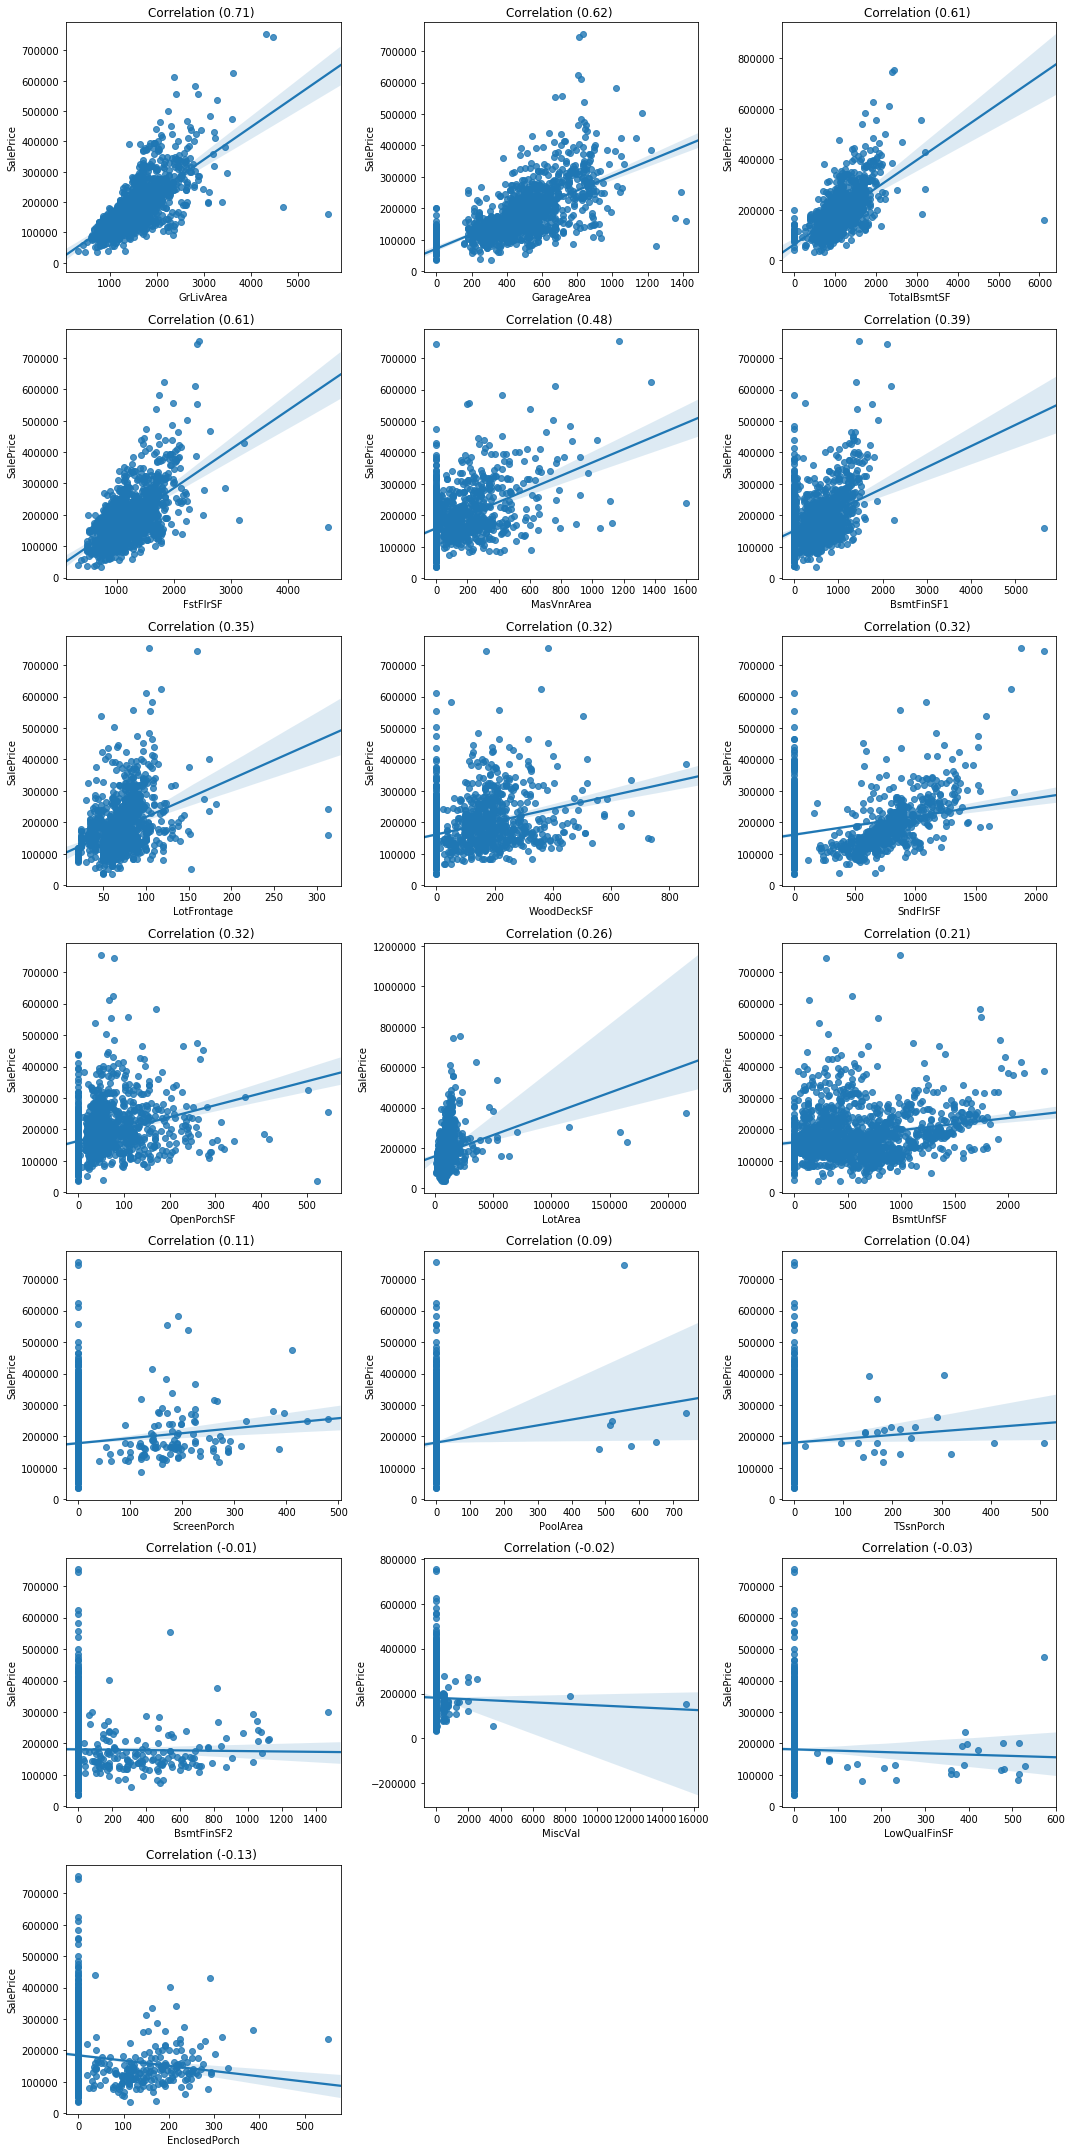

In [23]:
fig = plt.figure(figsize=(15,30))

for i, col in enumerate(numcont_ind):
    fig.add_subplot(7,3,1+i)
    sns.regplot(x=col, y='SalePrice', data=train)
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title('Correlation ({:1.2f}) '.format(train[col].corr(train['SalePrice'])))
fig.tight_layout()

fig.show()

## Outliers

Treatment Outlier

We are going to consider outliers observations that have:

--large values in almost all features and low SalePrice

--low values in almost all features and large SalePrice


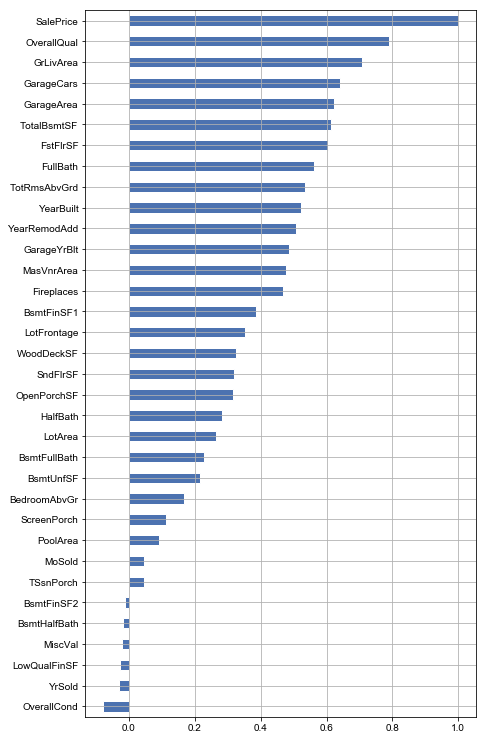

In [24]:
#Plot the correlation numerical variable vs SalePrice
fig, ax = plt.subplots(figsize=(7,13))
sns.set(font_scale=1)
train.corrwith(train['SalePrice']).sort_values()[2:].plot(kind='barh')

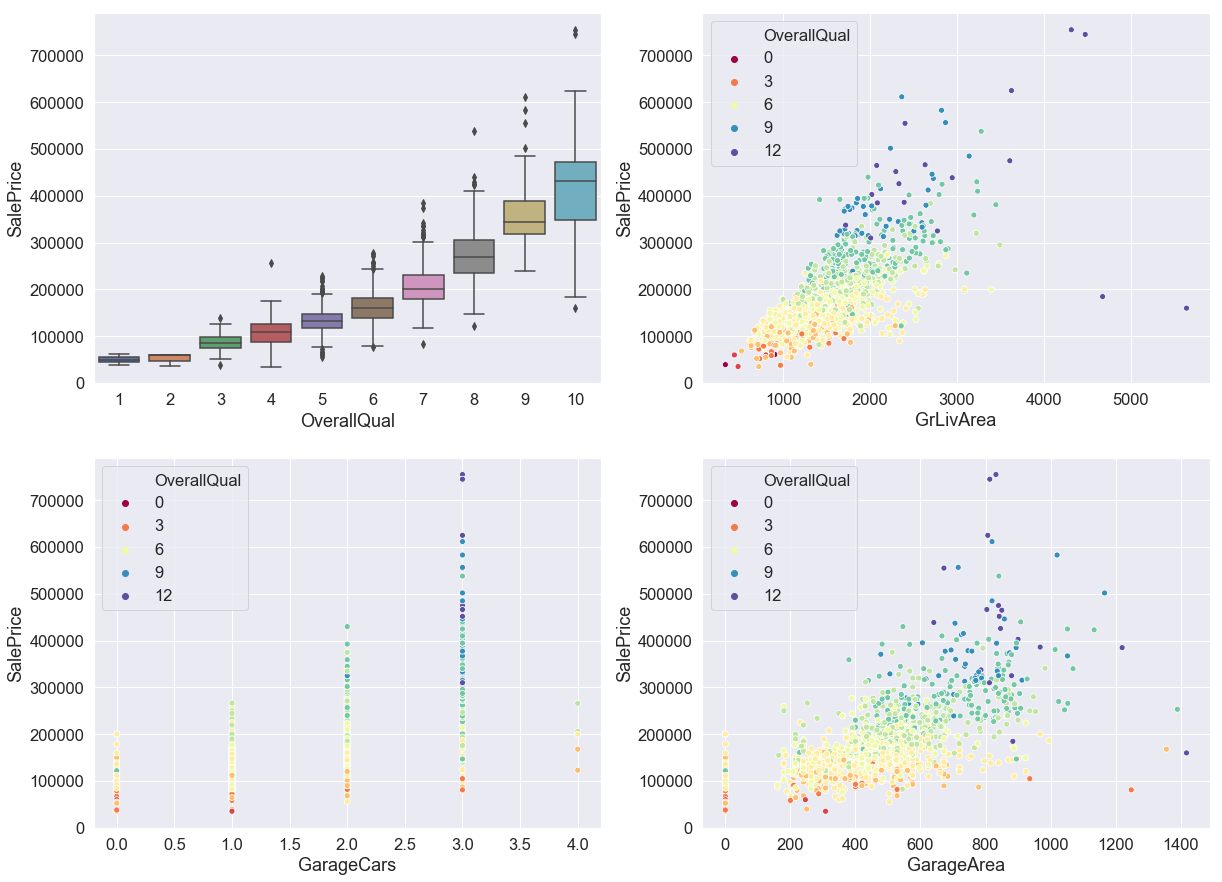

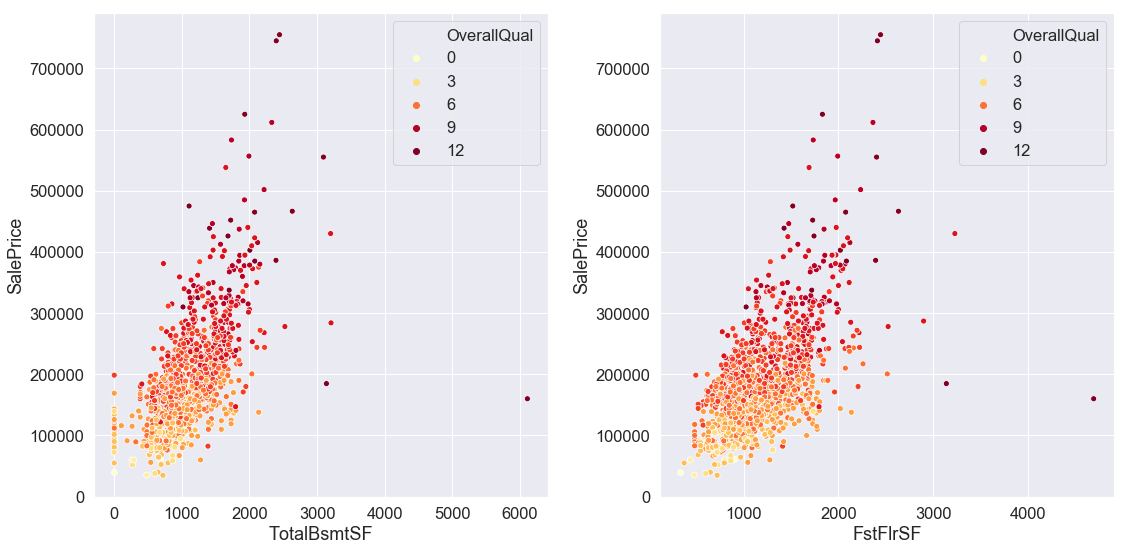

In [25]:
#Plot variables that have more correlation with SalePrice

# Overall Quality
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

# Box plot Overallqual
fig1 = fig.add_subplot(221); sns.boxplot(x='OverallQual', y='SalePrice', data=train[['SalePrice', 'OverallQual']])

# GrLivArea
fig2 = fig.add_subplot(222); 
sns.scatterplot(x = train.GrLivArea, y = train.SalePrice, 
hue=train.OverallQual, palette= 'Spectral')

# GarageCars
fig3 = fig.add_subplot(223); 
sns.scatterplot(x = train.GarageCars, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

# GarageArea
fig4 = fig.add_subplot(224); 
sns.scatterplot(x = train.GarageArea, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

fig5 = plt.figure(figsize=(16, 8))
fig6 = fig5.add_subplot(121); 
sns.scatterplot(x = train.TotalBsmtSF, y = train.SalePrice ,  hue=train.OverallQual, palette= 'YlOrRd')

fig7 = fig5.add_subplot(122); 
sns.scatterplot(x = train['FstFlrSF'],y = train.SalePrice,  hue=train.OverallQual, palette= 'YlOrRd')

plt.tight_layout(); plt.show()

## Outliers

Treatment Outlier


We are going to consider outliers observations that have:


--large values in almost all features and low SalePrice

--low values in almost all features and large SalePrice

In [26]:
#We analyze two observations in plot GrLivArea-SalePrice that have: 
# 523  GrLivArea=4676 SalePrice=184.750
# 1298 GrLivArea=5642 SalePrice=160.000

#The GrLivArea and FstFlrSF are in max or near and OverallQual is 10 but SalePrice is near 50% (median)
#These observations are in MSZoning Residential Low Density, the zone more common.
#If they would belong to Agriculture or Industrial will be reasonable that SalePrice will be low. 

train.loc[(train.GrLivArea>4000) & (train.SalePrice<200000), ['SalePrice','GrLivArea','OverallQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FstFlrSF', 'MSZoning']]

SalePrice  GrLivArea  OverallQual  GarageCars  GarageArea  TotalBsmtSF  \
523      184750       4676           10           3         884         3138   
1298     160000       5642           10           2        1418         6110   

      FstFlrSF MSZoning  
523       3138       RL  
1298      4692       RL

In [27]:
train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [28]:
df=train[['SalePrice','GrLivArea','OverallQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FstFlrSF']]
df.describe()

SalePrice  GrLivArea  OverallQual  GarageCars  GarageArea  TotalBsmtSF  \
count   1460.000   1460.000     1460.000    1460.000    1460.000     1460.000   
mean  180921.196   1515.464        6.099       1.767     472.980     1057.429   
std    79442.503    525.480        1.383       0.747     213.805      438.705   
min    34900.000    334.000        1.000       0.000       0.000        0.000   
25%   129975.000   1129.500        5.000       1.000     334.500      795.750   
50%   163000.000   1464.000        6.000       2.000     480.000      991.500   
75%   214000.000   1776.750        7.000       2.000     576.000     1298.250   
max   755000.000   5642.000       10.000       4.000    1418.000     6110.000   

       FstFlrSF  
count  1460.000  
mean   1162.627  
std     386.588  
min     334.000  
25%     882.000  
50%    1087.000  
75%    1391.250  
max    4692.000

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


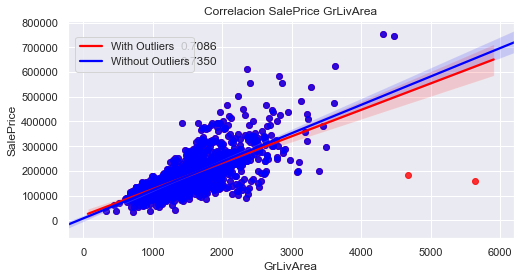

Correlacion SalePrice GrLivArea con Outlier:0.7086
Correlacion SalePrice GrLivArea sin Outlier:0.7350
Train observations after remove outliers: 1458


In [29]:
#Plot and drop outlier
fig = plt.figure(figsize=(8,4))
sns.set(font_scale=1)

sns.regplot(x = train['GrLivArea'], y = train['SalePrice'], color='red')
plt.text(x=1400, y=690000, s='{:1.4f}'.format(train['GrLivArea'].corr(train['SalePrice'])))
corrGLA_SP=train['GrLivArea'].corr(train['SalePrice'])

#Drop outlier
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
corrGLA_SP_wo=train['GrLivArea'].corr(train['SalePrice'])

sns.regplot(x =train['GrLivArea'], y = train['SalePrice'], color='blue')
plt.text(x=1400, y=630000, s='{:1.4f}'.format(train['GrLivArea'].corr(train['SalePrice'])))
plt.title('Correlacion SalePrice GrLivArea')
plt.legend(['With Outliers','Without Outliers'], loc='upper center', bbox_to_anchor=(0.15, 0.95))
plt.show()
del df
print('Correlacion SalePrice GrLivArea con Outlier:{:2.4f}'.format(corrGLA_SP))
print('Correlacion SalePrice GrLivArea sin Outlier:{:2.4f}'.format(corrGLA_SP_wo))
print('Train observations after remove outliers:',train.shape[0])

## Neighborhood

1458


/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


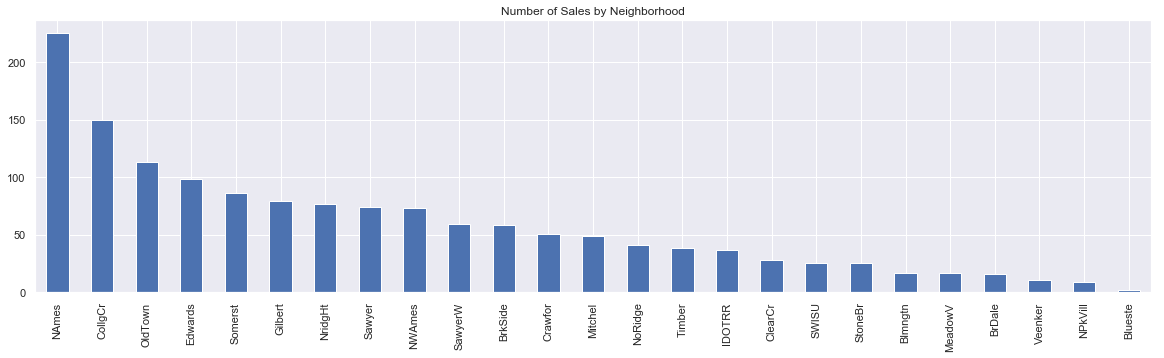

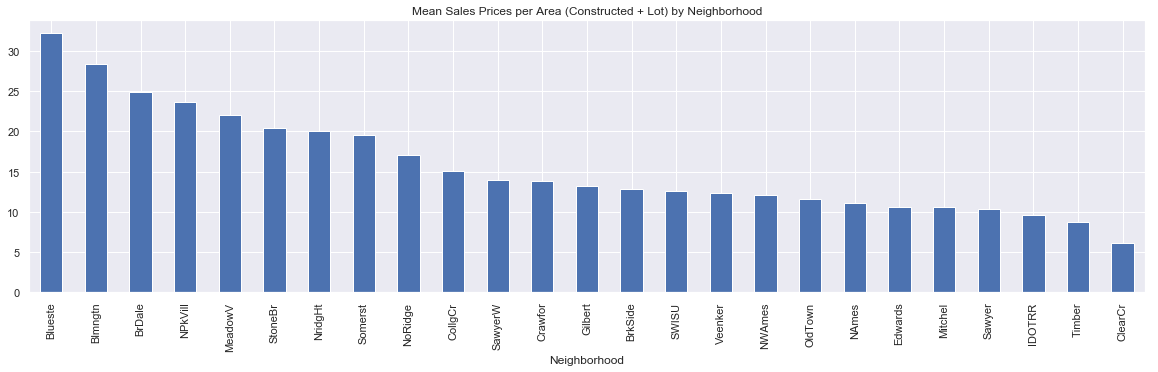

In [30]:
# Neighborhood
figa = plt.figure(figsize=(20, 5))
g = train['Neighborhood'].value_counts().plot(kind='bar', title='Number of Sales by Neighborhood')
print(train['Neighborhood'].value_counts().sum())
figb = plt.figure(figsize=(20, 5))
df = train[['SalePrice',  'Neighborhood']]

df['TotalArea'] = (train['TotalBsmtSF'].fillna(0) + train['WoodDeckSF'].fillna(0) + train['GrLivArea'].fillna(0) + 
                   train['LotArea'].fillna(0) + train['MasVnrArea'].fillna(0) + train['GarageArea'].fillna(0) + 
                   train['OpenPorchSF'].fillna(0) + train['TSsnPorch'].fillna(0) + train['ScreenPorch'].fillna(0) + 
                   train['EnclosedPorch'].fillna(0) + train['PoolArea'].fillna(0) )
 
df = df.groupby(by=['Neighborhood'], as_index=False).sum()

Neig = df[['SalePrice', 'TotalArea', 'Neighborhood']].groupby(by='Neighborhood', as_index=False).sum()
Neig['NeigPrice_Area'] = Neig['SalePrice'] / Neig['TotalArea']
Neig.drop(['TotalArea', 'SalePrice'], axis=1, inplace=True)
g = Neig.groupby('Neighborhood')['NeigPrice_Area'].sum().sort_values(ascending = False).\
    plot(kind='bar', title='Mean Sales Prices per Area (Constructed + Lot) by Neighborhood')
Neig = Neig.groupby(by='Neighborhood', as_index=True)['NeigPrice_Area', ].sum().sort_values(by=['NeigPrice_Area'],ascending = False)
Neig['NumBld']= train['Neighborhood'].value_counts()

In [31]:
Neig

NeigPrice_Area  NumBld
Neighborhood                        
Blueste               32.213       2
Blmngtn               28.365      17
BrDale                24.904      16
NPkVill               23.681       9
MeadowV               22.035      17
StoneBr               20.475      25
NridgHt               20.108      77
Somerst               19.552      86
NoRidge               17.038      41
CollgCr               15.135     150
SawyerW               13.993      59
Crawfor               13.773      51
Gilbert               13.260      79
BrkSide               12.785      58
SWISU                 12.635      25
Veenker               12.344      11
NWAmes                12.067      73
OldTown               11.571     113
NAmes                 11.096     225
Edwards               10.660      98
Mitchel               10.604      49
Sawyer                10.334      74
IDOTRR                 9.553      37
Timber                 8.723      38
ClearCr                6.114      28

## Missing values

Treatment missing values


In numeric variables will be replace with the most common value (median)


in categorical variables will be replace with the most common value (mode)

In [32]:
train.shape

(1458, 80)

In [33]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train['SalePrice']
train_test = pd.concat((train, test)).reset_index(drop=True)

print("All data observations have %d rows and %d columns"%(train_test.shape[0], train_test.shape[1]))

All data observations have 2917 rows and 80 columns


In [34]:
#Create a DataFrame with information train_test
observ = train_test.shape[0]

types = train_test.dtypes
counts = train_test.apply(lambda x: x.count())
nulls = train_test.apply(lambda x: x.isnull().sum())
missing_ratio = (train_test.isnull().sum()/ observ) * 100
uniques = train_test.apply(lambda x: [x.unique()])
distincts =train_test.apply(lambda x: x.unique().shape[0])

cols2={'types':types, 'counts':counts,'nulls':nulls, 'missing ratio':missing_ratio,'distincts':distincts,'uniques':uniques}
train_test_info=pd.DataFrame(cols2)

train_test_info
display(train_test_info.sort_values(by='missing ratio', ascending=False))

types  counts  nulls  missing ratio  distincts  \
PoolQC          object       9   2908         99.691          4   
MiscFeature     object     105   2812         96.400          5   
Alley           object     198   2719         93.212          3   
Fence           object     571   2346         80.425          5   
FireplaceQu     object    1497   1420         48.680          6   
LotFrontage    float64    2431    486         16.661        129   
GarageCond      object    2758    159          5.451          6   
GarageQual      object    2758    159          5.451          6   
GarageYrBlt    float64    2758    159          5.451        104   
GarageFinish    object    2758    159          5.451          4   
GarageType      object    2760    157          5.382          7   
BsmtCond        object    2835     82          2.811          5   
BsmtExposure    object    2835     82          2.811          5   
BsmtQual        object    2836     81          2.777          5   
BsmtFinType2    object    2837     80          2.743          7   
BsmtFinType1    object    2838     79          2.708          7   
MasVnrType      object    2893     24          0.823          5   
MasVnrArea     float64    2894     23          0.788        443   
MSZoning        object    2913      4          0.137          6   
BsmtHalfBath   float64    2915      2          0.069          4   
Functional      object    2915      2          0.069          8   
BsmtFullBath   float64    2915      2          0.069          5   
Utilities       object    2915      2          0.069          3   
BsmtUnfSF      float64    2916      1          0.034       1136   
KitchenQual     object    2916      1          0.034          5   
BsmtFinSF1     float64    2916      1          0.034        990   
SaleType        object    2916      1          0.034         10   
GarageCars     float64    2916      1          0.034          7   
GarageArea     float64    2916      1          0.034        603   
TotalBsmtSF    float64    2916      1          0.034       1057   
Exterior2nd     object    2916      1          0.034         17   
Exterior1st     object    2916      1          0.034         16   
Electrical      object    2916      1          0.034          6   
BsmtFinSF2     float64    2916      1          0.034        273   
TotRmsAbvGrd     int64    2917      0          0.000         14   
Fireplaces       int64    2917      0          0.000          5   
MSSubClass      object    2917      0          0.000         16   
BedroomAbvGr     int64    2917      0          0.000          8   
PavedDrive      object    2917      0          0.000          3   
WoodDeckSF       int64    2917      0          0.000        379   
OpenPorchSF      int64    2917      0          0.000        250   
EnclosedPorch    int64    2917      0          0.000        183   
TSsnPorch        int64    2917      0          0.000         31   
ScreenPorch      int64    2917      0          0.000        121   
PoolArea         int64    2917      0          0.000         13   
MiscVal          int64    2917      0          0.000         38   
MoSold           int64    2917      0          0.000         12   
YrSold           int64    2917      0          0.000          5   
SaleCondition   object    2917      0          0.000          6   
KitchenAbvGr     int64    2917      0          0.000          4   
CentralAir      object    2917      0          0.000          2   
HalfBath         int64    2917      0          0.000          3   
OverallCond      int64    2917      0          0.000          9   
LotArea          int64    2917      0          0.000       1949   
Street          object    2917      0          0.000          2   
LotShape        object    2917      0          0.000          4   
LandContour     object    2917      0          0.000          4   
LotConfig       object    2917      0          0.000          5   
LandSlope       object    2917      0          0.000          3 

In [35]:
# Electrical

# Identify the Most Common Electrical
display(train_test['Electrical'].value_counts())

train_test['Electrical'] = train_test['Electrical'].fillna('SBrkr')

SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [36]:
#Garage

Garage = ['GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageArea', 'GarageCars']
print(train_test[Garage].isnull().sum(), '\n')
# No Basement Av is the most common BsmtExposure. 
display(train_test[(train_test['GarageQual'].isnull())][Garage])

GarageYrBlt     159
GarageType      157
GarageFinish    159
GarageQual      159
GarageCond      159
GarageArea        1
GarageCars        1
dtype: int64 



GarageYrBlt GarageType GarageFinish GarageQual GarageCond  GarageArea  \
39            nan        NaN          NaN        NaN        NaN       0.000   
48            nan        NaN          NaN        NaN        NaN       0.000   
78            nan        NaN          NaN        NaN        NaN       0.000   
88            nan        NaN          NaN        NaN        NaN       0.000   
89            nan        NaN          NaN        NaN        NaN       0.000   
99            nan        NaN          NaN        NaN        NaN       0.000   
108           nan        NaN          NaN        NaN        NaN       0.000   
125           nan        NaN          NaN        NaN        NaN       0.000   
127           nan        NaN          NaN        NaN        NaN       0.000   
140           nan        NaN          NaN        NaN        NaN       0.000   
148           nan        NaN          NaN        NaN        NaN       0.000   
155           nan        NaN          NaN        NaN        NaN       0.000   
163           nan        NaN          NaN        NaN        NaN       0.000   
165           nan        NaN          NaN        NaN        NaN       0.000   
198           nan        NaN          NaN        NaN        NaN       0.000   
210           nan        NaN          NaN        NaN        NaN       0.000   
241           nan        NaN          NaN        NaN        NaN       0.000   
250           nan        NaN          NaN        NaN        NaN       0.000   
287           nan        NaN          NaN        NaN        NaN       0.000   
291           nan        NaN          NaN        NaN        NaN       0.000   
307           nan        NaN          NaN        NaN        NaN       0.000   
375           nan        NaN          NaN        NaN        NaN       0.000   
386           nan        NaN          NaN        NaN        NaN       0.000   
393           nan        NaN          NaN        NaN        NaN       0.000   
431           nan        NaN          NaN        NaN        NaN       0.000   
434           nan        NaN          NaN        NaN        NaN       0.000   
441           nan        NaN          NaN        NaN        NaN       0.000   
464           nan        NaN          NaN        NaN        NaN       0.000   
495           nan        NaN          NaN        NaN        NaN       0.000   
520           nan        NaN          NaN        NaN        NaN       0.000   
527           nan        NaN          NaN        NaN        NaN       0.000   
532           nan        NaN          NaN        NaN        NaN       0.000   
534           nan        NaN          NaN        NaN        NaN       0.000   
561           nan        NaN          NaN        NaN        NaN       0.000   
581           nan        NaN          NaN        NaN        NaN       0.000   
612           nan        NaN          NaN        NaN        NaN       0.000   
613           nan        NaN          NaN        NaN        NaN       0.000   
619           nan        NaN          NaN        NaN        NaN       0.000   
634           nan        NaN          NaN        NaN        NaN       0.000   
635           nan        NaN          NaN        NaN        NaN       0.000   
637           nan        NaN          NaN        NaN        NaN       0.000   
648           nan        NaN          NaN        NaN        NaN       0.000   
704           nan        NaN          NaN        NaN        NaN       0.000   
709           nan        NaN          NaN        NaN        NaN       0.000   
737           nan        NaN          NaN        NaN        NaN       0.000   
749           nan        NaN          NaN        NaN        NaN       0.000   
783           nan        NaN          NaN        NaN        NaN       0.000   
825           nan        NaN          NaN        NaN        NaN       0.000   
842           nan        NaN          NaN        NaN        NaN       0.000   
920           nan        NaN          NaN        NaN    

In [37]:
# Fill Missing Values of Garage Features
c = train_test[~train_test['GarageType'].isnull()][Garage]
c[c['GarageYrBlt'].isnull()]

GarageYrBlt GarageType GarageFinish GarageQual GarageCond  GarageArea  \
2124          nan     Detchd          NaN        NaN        NaN     360.000   
2574          nan     Detchd          NaN        NaN        NaN         nan   

      GarageCars  
2124       1.000  
2574         nan

In [38]:
# Group by GarageType
train_test['GarageType'] = train_test['GarageType'].fillna('NA')

# fill missing value with median where GarageType=='Detchd' and 0 for the others
cmedian = train_test[train_test['GarageType']=='Detchd']['GarageArea'].median()
print("GarageArea median of Type Detchd:", cmedian)
train_test.loc[train_test['GarageType']=='Detchd', 'GarageArea'] = train_test.loc[train_test['GarageType']=='Detchd', 'GarageArea'].fillna(cmedian)                                                                     
train_test['GarageArea'] = train_test['GarageArea'].fillna(0)

cmedian = train_test[train_test['GarageType']=='Detchd']['GarageCars'].median()
print("GarageCars median of Type Detchd:", cmedian)
train_test.loc[train_test['GarageType']=='Detchd', 'GarageCars'] = train_test.loc[train_test['GarageType']=='Detchd', 'GarageCars'].fillna(cmedian)                                                 
train_test['GarageCars'] = train_test['GarageCars'].fillna(0)

cmedian = train_test[train_test['GarageType']=='Detchd']['GarageYrBlt'].median()
print("GarageYrBlt median of Type Detchd:", cmedian)
train_test.loc[train_test['GarageType']=='Detchd', 'GarageYrBlt'] = train_test.loc[train_test['GarageType']=='Detchd', 'GarageYrBlt'].fillna(cmedian)                                                                        
train_test['GarageYrBlt'] = train_test['GarageYrBlt'].fillna(0)

# fill missing value with mode where GarageType=='Detchd' and 'NA' for the others
cmode = train_test[train_test['GarageType']=='Detchd']['GarageFinish'].mode()[0]
print("GarageFinish mode of Type Detchd:", cmode)
train_test.loc[train_test['GarageType']=='Detchd', 'GarageFinish'] = train_test.loc[train_test['GarageType']=='Detchd', 'GarageFinish'].fillna(cmode)                                                                         
train_test['GarageFinish'] = train_test['GarageFinish'].fillna('NA')

cmode = train_test[train_test['GarageType']=='Detchd']['GarageQual'].mode()[0]
print("GarageQual mode of Type Detchd: %s" %cmode)
train_test.loc[train_test['GarageType']=='Detchd', 'GarageQual'] = train_test.loc[train_test['GarageType']=='Detchd', 'GarageQual'].fillna(cmode)                                                                        
train_test['GarageQual'] = train_test['GarageQual'].fillna('NA')

cmode = train_test[train_test.GarageType=='Detchd']['GarageCond'].mode()[0]
print("GarageCond mode of Type Detchd:", cmode)
train_test.loc[train_test['GarageType']=='Detchd', 'GarageCond'] = train_test.loc[train_test['GarageType']=='Detchd', 'GarageCond'].fillna(cmode)                                                                        
train_test['GarageCond'] = train_test['GarageCond'].fillna('NA')


GarageArea median of Type Detchd: 399.5
GarageCars median of Type Detchd: 2.0
GarageYrBlt median of Type Detchd: 1962.0
GarageFinish mode of Type Detchd: Unf
GarageQual mode of Type Detchd: TA
GarageCond mode of Type Detchd: TA


In [39]:
print('Garage Nulls:')
print(train_test[Garage].isnull().sum())

Garage Nulls:
GarageYrBlt     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
GarageArea      0
GarageCars      0
dtype: int64


In [40]:
#Mansory veneer

# Correct Mansory veneer types
MasVnr = ['MasVnrArea', 'MasVnrType']
# All None Types with Area greater than 0 update to BrkFace type
train_test.loc[(train_test['MasVnrType']=='None') & (train_test['MasVnrArea']>0), ['MasVnrType']] = 'BrkFace'

# All Types null with Are greater than 0 update to BrkFace type
train_test.loc[(train_test['MasVnrType'].isnull()) & (train_test['MasVnrArea']>0), ['MasVnrType']] = 'BrkFace'

# All Types different from None with Are equal to 0 update to median Area of no None types with Areas
train_test.loc[(train_test['MasVnrType']!='None') & 
             (train_test['MasVnrArea']==0), ['MasVnrArea']] = train_test.loc[(train_test['MasVnrType']!='None') & 
                                                                      (train_test['MasVnrArea']>0), ['MasVnrArea']].median()[0]
# Filling 0 and None for records wheres both are nulls
train_test['MasVnrArea'] = train_test['MasVnrArea'].fillna(0)
train_test['MasVnrType'] = train_test['MasVnrType'].fillna('None')

In [41]:
c = train_test[~train_test['MasVnrType'].isnull()][MasVnr]
print('Masonry veneer Nulls:')
print(train_test[MasVnr].isnull().sum(), '\n')

Masonry veneer Nulls:
MasVnrArea    0
MasVnrType    0
dtype: int64 



In [42]:
#Basement

Bsmt = ['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath', 
        'BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
print(train_test[Bsmt].isnull().sum(), '\n')
# No Basement Av is the most common BsmtExposure. 
display(train_test[(train_test['BsmtQual'].isnull())][Bsmt])

BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
BsmtQual        81
BsmtCond        82
BsmtExposure    82
BsmtFinType1    79
BsmtFinType2    80
dtype: int64 



BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  \
17         0.000       0.000      0.000        0.000         0.000   
39         0.000       0.000      0.000        0.000         0.000   
90         0.000       0.000      0.000        0.000         0.000   
102        0.000       0.000      0.000        0.000         0.000   
156        0.000       0.000      0.000        0.000         0.000   
182        0.000       0.000      0.000        0.000         0.000   
259        0.000       0.000      0.000        0.000         0.000   
342        0.000       0.000      0.000        0.000         0.000   
362        0.000       0.000      0.000        0.000         0.000   
371        0.000       0.000      0.000        0.000         0.000   
392        0.000       0.000      0.000        0.000         0.000   
520        0.000       0.000      0.000        0.000         0.000   
531        0.000       0.000      0.000        0.000         0.000   
532        0.000       0.000      0.000        0.000         0.000   
552        0.000       0.000      0.000        0.000         0.000   
645        0.000       0.000      0.000        0.000         0.000   
704        0.000       0.000      0.000        0.000         0.000   
735        0.000       0.000      0.000        0.000         0.000   
748        0.000       0.000      0.000        0.000         0.000   
777        0.000       0.000      0.000        0.000         0.000   
867        0.000       0.000      0.000        0.000         0.000   
893        0.000       0.000      0.000        0.000         0.000   
896        0.000       0.000      0.000        0.000         0.000   
983        0.000       0.000      0.000        0.000         0.000   
999        0.000       0.000      0.000        0.000         0.000   
1010       0.000       0.000      0.000        0.000         0.000   
1034       0.000       0.000      0.000        0.000         0.000   
1044       0.000       0.000      0.000        0.000         0.000   
1047       0.000       0.000      0.000        0.000         0.000   
1048       0.000       0.000      0.000        0.000         0.000   
1089       0.000       0.000      0.000        0.000         0.000   
1178       0.000       0.000      0.000        0.000         0.000   
1215       0.000       0.000      0.000        0.000         0.000   
1217       0.000       0.000      0.000        0.000         0.000   
1231       0.000       0.000      0.000        0.000         0.000   
1319       0.000       0.000      0.000        0.000         0.000   
1410       0.000       0.000      0.000        0.000         0.000   
1583       0.000       0.000      0.000        0.000         0.000   
1591       0.000       0.000      0.000        0.000         0.000   
1727       0.000       0.000      0.000        0.000         0.000   
1776       0.000       0.000      0.000        0.000         0.000   
1812       0.000       0.000      0.000        0.000         0.000   
1845       0.000       0.000      0.000        0.000         0.000   
1846       0.000       0.000      0.000        0.000         0.000   
1854       0.000       0.000      0.000        0.000         0.000   
1855       0.000       0.000      0.000        0.000         0.000   
1856       0.000       0.000      0.000        0.000         0.000   
1858       0.000       0.000      0.000        0.000         0.000   
1913       0.000       0.000      0.000        0.000         0.000   
2048       0.000       0.000      0.000        0.000         0.000   
2064       0.000       0.000      0.000        0.000         0.000   
2066       0.000       0.000      0.000        0.000         0.000   
2118         nan         nan        nan          nan           nan   
2120       0.000       0.000      0.000        0.000         0.000   
2186       0.000       0.000      0.000        0.000           nan   
2187       0.000       0.000      0.000        0.000         0.000   
2188       0.000

In [43]:
# No Basement Av is the most common BsmtExposure. 
display(train_test['BsmtExposure'].value_counts())

train_test.loc[(~train_test['TotalBsmtSF'].isnull()) & 
               (train_test['BsmtExposure'].isnull()) & 
               (train_test['TotalBsmtSF']>0), 'BsmtExposure'] = 'Av'

No    1904
Av     418
Gd     274
Mn     239
Name: BsmtExposure, dtype: int64

In [44]:
# TA is the most common BsmtQual. 
display(train_test['BsmtQual'].value_counts())

train_test.loc[(~train_test['TotalBsmtSF'].isnull()) & 
             (train_test['BsmtQual'].isnull()) & 
             (train_test['TotalBsmtSF']>0), 'BsmtQual'] = 'TA'

TA    1283
Gd    1209
Ex     256
Fa      88
Name: BsmtQual, dtype: int64

In [45]:
# TA is the most common BsmtCond. 
display(train_test['BsmtCond'].value_counts())

train_test.loc[(~train_test['TotalBsmtSF'].isnull()) & (train_test['BsmtCond'].isnull()) & (train_test['TotalBsmtSF']>0), 'BsmtCond'] = 'TA'

TA    2604
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [46]:
# Unf is the most common BsmtFinType2. 
display(train_test['BsmtFinType2'].value_counts())

# We use Unf for all cases where BsmtFinType2 is null but BsmtFinSF2 is greater than Zero
train_test.loc[(train_test['BsmtFinSF2']>0) & (train_test['BsmtFinType2'].isnull()) , 'BsmtFinType2'] = 'Unf'

Unf    2491
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [47]:
# BsmtFinType2 is BLQ and the Area is Zero, but its area was inputed at Unfinesh
display(train_test[(train_test['BsmtFinSF2']==0) & (train_test['BsmtFinType2']!='Unf') & (~train_test['BsmtFinType2'].isnull())][Bsmt])

# Correct BsmtFinSF2 and BsmtUnfSF:
train_test.loc[(train_test['BsmtFinSF2']==0) & (train_test['BsmtFinType2']!='Unf') & (~train_test['BsmtFinType2'].isnull()), 'BsmtFinSF2'] = 354.0
train_test.loc[(train_test['BsmtFinSF2']==0) & (train_test['BsmtFinType2']!='Unf') & (~train_test['BsmtFinType2'].isnull()), 'BsmtUnfSF'] = 0.0

BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  \
1468    1051.000       0.000    354.000     1405.000         1.000   

      BsmtHalfBath BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  
1468         0.000       Gd       TA           No          GLQ          BLQ

In [48]:
# We update these Zero or NA according to their dictionary:
nulls_cols = {'BsmtExposure': 'NA', 'BsmtFinType2': 'NA', 'BsmtQual': 'NA', 'BsmtCond': 'NA', 'BsmtFinType1': 'NA',
              'BsmtFinSF1': 0, 'BsmtFinSF2': 0, 'BsmtUnfSF': 0 ,'TotalBsmtSF': 0, 'BsmtFullBath': 0, 'BsmtHalfBath': 0}

train_test = train_test.fillna(value=nulls_cols)

In [49]:
print('Basement Nulls:')
print(train_test[Bsmt].isnull().sum())

Basement Nulls:
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64


In [50]:
# Lot Frontage
#fill missing value with Lot frontage median of the respect Neigborhood
train_test['LotFrontage'] = train_test['LotFrontage'].fillna(train_test.groupby(['Neighborhood'])['LotFrontage'].transform('mean'))

In [51]:
Pool=['PoolArea','PoolQC']
display(train_test[(train_test['PoolArea']>0)][Pool])

PoolArea PoolQC
197        512     Ex
809        648     Fa
1169       576     Gd
1181       555     Ex
1384       519     Fa
1421       738     Gd
1972       144     Ex
2418       368    NaN
2501       444    NaN
2571       228     Ex
2597       561    NaN
2708       800     Gd

In [52]:
# Pool Quality
PoolQC = {0: 'NA', 1: 'Po', 2: 'Fa', 3: 'TA', 4: 'Gd', 5: 'Ex'}

train_test.loc[(train_test['PoolArea']>0) & (train_test['PoolQC'].isnull()), ['PoolQC']] =\
        ((train_test.loc[(train_test['PoolArea']>0) & (train_test['PoolQC'].isnull()), ['OverallQual']]/2).round()).\
        apply(lambda x: x.map(PoolQC))

train_test['PoolQC'] = train_test['PoolQC'].fillna('NA')

In [53]:
# Functional
train_test['Functional'] = train_test['Functional'].fillna('Typ')

In [54]:
# Fireplace Quality
train_test.loc[(train_test['Fireplaces']==0) & (train_test['FireplaceQu'].isnull()), ['FireplaceQu']] = 'NA'

In [55]:
#Kitchen Quality
train_test.loc[(train_test['KitchenAbvGr']>0) & (train_test['KitchenQual'].isnull()), 
             ['KitchenQual']] = train_test['KitchenQual'].mode()[0]

In [56]:
# MSZoning, Exterior1st, Exterior2nd, Utilities and SaleType Feature
train_test['MSZoning'] = train_test['MSZoning'].fillna('RL')
train_test['Exterior1st'] = train_test['Exterior1st'].fillna('VinylSd')
train_test['Exterior2nd'] = train_test['Exterior2nd'].fillna('VinylSd')
train_test['Utilities'] = train_test['Utilities'].fillna('AllPub')
train_test['SaleType'] = train_test['SaleType'].fillna('WD')

In [57]:
# Alley, Fence and Miscellaneous Feature. Miss Values Treatment
train_test['Alley'] = train_test['Alley'].fillna('NA')
train_test['Fence'] = train_test['Fence'].fillna('NA')
train_test['MiscFeature'] = train_test['MiscFeature'].fillna('NA')

In [58]:
#Garage Year Build from 2207
display(train_test.loc[train_test['GarageYrBlt']==2207, ['GarageYrBlt', 'YearBuilt']])
train_test.loc[train_test['GarageYrBlt']==2207.0, 'GarageYrBlt'] = 2007.0

GarageYrBlt  YearBuilt
2590     2207.000       2006

In [59]:
# Final check if we have some NA
print("Data nulls:", train_test.isnull().sum().sum())

Data nulls: 0


## Ordinal variables (categorical)

Related various items within the property


In [60]:
catord_cols = train[['OverallQual','OverallCond','LandSlope','ExterQual', 
 'ExterCond','HeatingQC','KitchenQual','FireplaceQu',
 'GarageCond','PavedDrive','LotShape', 'BsmtQual','BsmtCond',
 'GarageQual','PoolQC','BsmtExposure','BsmtFinType1','BsmtFinType2',
 'CentralAir','GarageFinish','Functional','Street','Fence']]

In [61]:
SP_cols=train['SalePrice']
catordSP_cols=pd.concat([SP_cols, catord_cols], axis=1)

In [62]:
catordSP_cols

SalePrice  OverallQual  OverallCond LandSlope ExterQual ExterCond  \
0        208500            7            5       Gtl        Gd        TA   
1        181500            6            8       Gtl        TA        TA   
2        223500            7            5       Gtl        Gd        TA   
3        140000            7            5       Gtl        TA        TA   
4        250000            8            5       Gtl        Gd        TA   
5        143000            5            5       Gtl        TA        TA   
6        307000            8            5       Gtl        Gd        TA   
7        200000            7            6       Gtl        TA        TA   
8        129900            7            5       Gtl        TA        TA   
9        118000            5            6       Gtl        TA        TA   
10       129500            5            5       Gtl        TA        TA   
11       345000            9            5       Gtl        Ex        TA   
12       144000            5            6       Gtl        TA        TA   
13       279500            7            5       Gtl        Gd        TA   
14       157000            6            5       Gtl        TA        TA   
15       132000            7            8       Gtl        TA        TA   
16       149000            6            7       Gtl        TA        TA   
17        90000            4            5       Gtl        TA        TA   
18       159000            5            5       Gtl        TA        TA   
19       139000            5            6       Gtl        TA        TA   
20       325300            8            5       Gtl        Gd        TA   
21       139400            7            7       Gtl        TA        TA   
22       230000            8            5       Gtl        Gd        TA   
23       129900            5            7       Gtl        TA        TA   
24       154000            5            8       Gtl        TA        Gd   
25       256300            8            5       Gtl        Gd        TA   
26       134800            5            7       Gtl        TA        TA   
27       306000            8            5       Gtl        Gd        TA   
28       207500            5            6       Gtl        TA        TA   
29        68500            4            6       Gtl        TA        TA   
30        40000            4            4       Gtl        TA        Fa   
31       149350            5            6       Gtl        TA        TA   
32       179900            8            5       Gtl        Gd        TA   
33       165500            5            5       Gtl        TA        TA   
34       277500            9            5       Gtl        Ex        TA   
35       309000            8            5       Gtl        Gd        TA   
36       145000            5            5       Gtl        TA        TA   
37       153000            5            6       Gtl        TA        TA   
38       109000            5            7       Gtl        TA        Gd   
39        82000            4            5       Gtl        TA        TA   
40       160000            6            5       Gtl        TA        TA   
41       170000            5            6       Gtl        TA        Gd   
42       144000            5            7       Gtl        TA        TA   
43       130250            5            6       Gtl        TA        TA   
44       141000            5            6       Gtl        TA        TA   
45       319900            9            5       Gtl        Ex        TA   
46       239686            7            5       Gtl        Gd        TA   
47       249700            8            5       Gtl        Gd        TA   
48       113000            4            5       Gtl        TA        TA   
49       127000            5            7       Gtl        TA        TA   
50       177000            6            6       Gtl        TA        TA   
51       114500            6            6       Gtl        TA        TA   
52       110000            5   

## Mapping Ordinal Features

OverallQuall and OverallCond already is arranged

In [63]:
# LandSlope
LandSlope = {'Gtl':3,'Mod':2,'Sev':1}
train_test['LandSlope'] = train_test['LandSlope'].map(LandSlope)
        
# ExterQual
ExterQual = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0 }
train_test['ExterQual'] = train_test['ExterQual'].map(ExterQual)

# ExterCond
train_test['ExterCond'] = train_test['ExterCond'].map(ExterQual)

# HeatingQC
train_test['HeatingQC'] = train_test['HeatingQC'].map(ExterQual)

# KitchenQual
train_test['KitchenQual'] = train_test['KitchenQual'].map(ExterQual)

# FireplaceQu
train_test['FireplaceQu'] = train_test['FireplaceQu'].map(ExterQual)

# GarageCond
train_test['GarageCond'] = train_test['GarageCond'].map(ExterQual)

# PavedDrive
PavedDrive = {'Y':3,'P':2,'N':1}
train_test['PavedDrive'] = train_test['PavedDrive'].map(PavedDrive)

# LotShape
LotShape = {'Reg':4,'IR1':3,'IR2':2,'IR3':1}
train_test['LotShape'] = train_test['LotShape'].map(LotShape)

# BsmtQual
BsmtQual = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
train_test['BsmtQual'] = train_test['BsmtQual'].map(BsmtQual)

# BsmtCond
train_test['BsmtCond'] = train_test['BsmtCond'].map(BsmtQual)

# GarageQual
train_test['GarageQual'] = train_test['GarageQual'].map(BsmtQual)

# PoolQC
train_test['PoolQC'] = train_test['PoolQC'].map(BsmtQual)
    
# BsmtExposure
BsmtExposure = {'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0}
train_test['BsmtExposure'] = train_test['BsmtExposure'].map(BsmtExposure)

# BsmtFinType1
BsmtFinType1 = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0 }
train_test['BsmtFinType1'] = train_test['BsmtFinType1'].map(BsmtFinType1)

# BsmtFinType2
train_test['BsmtFinType2'] = train_test['BsmtFinType2'].map(BsmtFinType1)

# CentralAir
CentralAir = {'N':0,'Y':1}
train_test['CentralAir'] = train_test['CentralAir'].map(CentralAir)

# GarageFinish
GarageFinish = {'Fin':3,'RFn':2,'Unf':1,'NA':0}
train_test['GarageFinish'] = train_test['GarageFinish'].map(GarageFinish)
    
# Functional
Functional = {'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0}
train_test['Functional'] = train_test['Functional'].map(Functional)
    
# Street
Street = {'Grvl':0,'Pave':1}
train_test['Street'] = train_test['Street'].map(Street)

# Fence
Fence = {'GdPrv':5,'MnPrv':4,'GdWo':3,'MnWw':2,'NA':1}
train_test['Fence'] = train_test['Fence'].map(Fence)


In [64]:
SP_cols=train['SalePrice']
catordSP_cols=pd.concat([SP_cols, catord_cols], axis=1)
catordSP_cols

SalePrice  OverallQual  OverallCond LandSlope ExterQual ExterCond  \
0        208500            7            5       Gtl        Gd        TA   
1        181500            6            8       Gtl        TA        TA   
2        223500            7            5       Gtl        Gd        TA   
3        140000            7            5       Gtl        TA        TA   
4        250000            8            5       Gtl        Gd        TA   
5        143000            5            5       Gtl        TA        TA   
6        307000            8            5       Gtl        Gd        TA   
7        200000            7            6       Gtl        TA        TA   
8        129900            7            5       Gtl        TA        TA   
9        118000            5            6       Gtl        TA        TA   
10       129500            5            5       Gtl        TA        TA   
11       345000            9            5       Gtl        Ex        TA   
12       144000            5            6       Gtl        TA        TA   
13       279500            7            5       Gtl        Gd        TA   
14       157000            6            5       Gtl        TA        TA   
15       132000            7            8       Gtl        TA        TA   
16       149000            6            7       Gtl        TA        TA   
17        90000            4            5       Gtl        TA        TA   
18       159000            5            5       Gtl        TA        TA   
19       139000            5            6       Gtl        TA        TA   
20       325300            8            5       Gtl        Gd        TA   
21       139400            7            7       Gtl        TA        TA   
22       230000            8            5       Gtl        Gd        TA   
23       129900            5            7       Gtl        TA        TA   
24       154000            5            8       Gtl        TA        Gd   
25       256300            8            5       Gtl        Gd        TA   
26       134800            5            7       Gtl        TA        TA   
27       306000            8            5       Gtl        Gd        TA   
28       207500            5            6       Gtl        TA        TA   
29        68500            4            6       Gtl        TA        TA   
30        40000            4            4       Gtl        TA        Fa   
31       149350            5            6       Gtl        TA        TA   
32       179900            8            5       Gtl        Gd        TA   
33       165500            5            5       Gtl        TA        TA   
34       277500            9            5       Gtl        Ex        TA   
35       309000            8            5       Gtl        Gd        TA   
36       145000            5            5       Gtl        TA        TA   
37       153000            5            6       Gtl        TA        TA   
38       109000            5            7       Gtl        TA        Gd   
39        82000            4            5       Gtl        TA        TA   
40       160000            6            5       Gtl        TA        TA   
41       170000            5            6       Gtl        TA        Gd   
42       144000            5            7       Gtl        TA        TA   
43       130250            5            6       Gtl        TA        TA   
44       141000            5            6       Gtl        TA        TA   
45       319900            9            5       Gtl        Ex        TA   
46       239686            7            5       Gtl        Gd        TA   
47       249700            8            5       Gtl        Gd        TA   
48       113000            4            5       Gtl        TA        TA   
49       127000            5            7       Gtl        TA        TA   
50       177000            6            6       Gtl        TA        TA   
51       114500            6            6       Gtl        TA        TA   
52       110000            5   

In [65]:
catord_ind=catord_cols.corrwith(train_test['SalePrice']).sort_values(ascending=False).index[1:]
catord_ind.shape

(1,)

In [66]:
catord_cols.corrwith(train['SalePrice']).sort_values(ascending=False)

OverallQual    0.796
OverallCond   -0.078
dtype: float64

## Feature Engineering: Create New Features

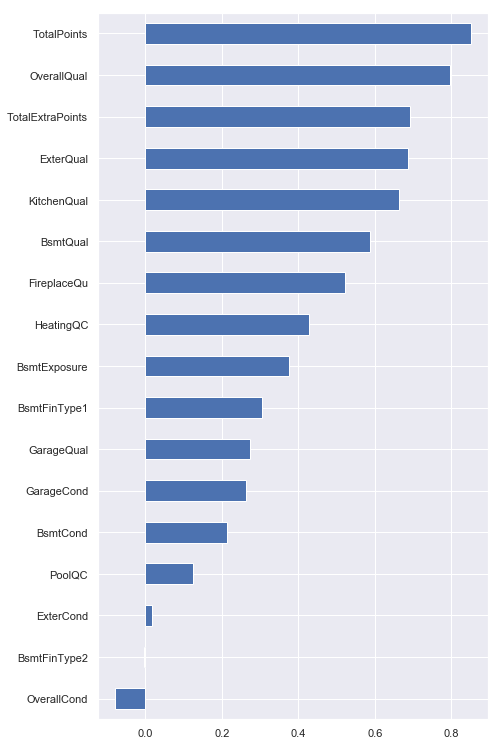

In [67]:
# Points Review
train_test['TotalExtraPoints'] = train_test['HeatingQC'] + train_test['PoolQC'] + train_test['FireplaceQu']  + train_test['KitchenQual']
train_test['TotalPoints'] =  (train_test['ExterQual'] + train_test['FireplaceQu'] + train_test['GarageQual'] + train_test['KitchenQual'] + train_test['BsmtQual'] + 
                             train_test['BsmtExposure'] + train_test['BsmtFinType1'] + train_test['PoolQC'] + train_test['ExterCond'] + train_test['BsmtCond'] + 
                             train_test['GarageCond'] + train_test['OverallCond'] + train_test['BsmtFinType2'] + train_test['HeatingQC']) + train_test['OverallQual']**2
                         
df = train_test.loc[(train_test.SalePrice>0), ['TotalPoints', 'TotalExtraPoints', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 
      'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'PoolQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'SalePrice']]

#Plot the correlation ordinal variable vs SalePrice
fig, ax = plt.subplots(figsize=(7,13))
sns.set(font_scale=1)
df.corrwith(df['SalePrice']).sort_values(ascending=True)[:-1].plot(kind='barh')

In [68]:
# Correlation ordinal variables vs SalePrice
df.corrwith(df['SalePrice']).sort_values(ascending=False)[1:]

TotalPoints         0.850
OverallQual         0.796
TotalExtraPoints    0.692
ExterQual           0.687
KitchenQual         0.662
BsmtQual            0.587
FireplaceQu         0.521
HeatingQC           0.428
BsmtExposure        0.377
BsmtFinType1        0.305
GarageQual          0.274
GarageCond          0.263
BsmtCond            0.213
PoolQC              0.124
ExterCond           0.019
BsmtFinType2       -0.004
OverallCond        -0.078
dtype: float64

In [69]:
# Group similar variables.
train_test['ConstructArea'] = (train_test['TotalBsmtSF'] + train_test['WoodDeckSF'] + train_test['GrLivArea'] + 
                               train_test['OpenPorchSF'] + train_test['TSsnPorch'] + train_test['ScreenPorch'] + 
                               train_test['EnclosedPorch'] + train_test['MasVnrArea'] + train_test['GarageArea'] + 
                               train_test['PoolArea'])

train_test['TotalArea'] = train_test['ConstructArea'] + train_test['LotArea']

train_test['Garage_Newest'] = train_test['YearBuilt'] > train_test['GarageYrBlt']
train_test['Garage_Newest'] = train_test['Garage_Newest'].apply(lambda x: 1 if x else 0)

train_test['TotalPorchSF'] = train_test['OpenPorchSF'] + train_test['EnclosedPorch'] + train_test['TSsnPorch'] + train_test['ScreenPorch'] + train_test['WoodDeckSF']

train_test['LotAreaMultSlope'] = train_test['LotArea'] * train_test['LandSlope']

train_test['GarageArea_x_Car'] = train_test['GarageArea'] * train_test['GarageCars']

train_test['TotalBsmtSF_x_FstFl'] = train_test['TotalBsmtSF'] * train_test['FstFlrSF']

train_test['BsmtSFPoints'] = (train_test['BsmtQual']**2 + train_test['BsmtCond'] + train_test['BsmtExposure'] + train_test['BsmtFinType1'] + train_test['BsmtFinType2'])

train_test['BsmtSFMultPoints'] = train_test['TotalBsmtSF'] * (train_test['BsmtQual']**2 + train_test['BsmtCond'] + train_test['BsmtExposure'] + train_test['BsmtFinType1'] + train_test['BsmtFinType2'])

train_test['TotBathrooms'] = train_test['FullBath'] + (train_test['HalfBath']*0.5) + train_test['BsmtFullBath'] + (train_test['BsmtHalfBath']*0.5)

In [70]:
# Transform Years to Ages
def AgeYears(feature): 
    return feature.apply(lambda x: 0 if x==0 else (2011 - x))

train_test['YearBuilt'] = AgeYears(train_test['YearBuilt'])
train_test['YearRemodAdd'] = AgeYears(train_test['YearRemodAdd'])
train_test['GarageYrBlt'] = AgeYears(train_test['GarageYrBlt']) 
train_test['YrSold'] =  AgeYears(train_test['YrSold'])
train_test['Age'] = train_test['YearRemodAdd'] - train_test['YrSold']

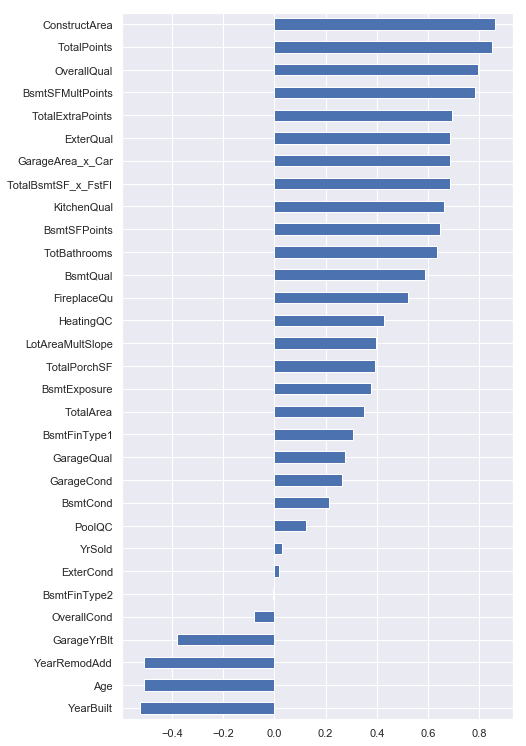

In [71]:
df = train_test.loc[(train_test.SalePrice>0), ['TotalPoints', 'TotalExtraPoints', 
      'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 
      'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 
      'PoolQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'SalePrice',
      'ConstructArea', 'TotalArea', 'TotalPorchSF', 'LotAreaMultSlope', 'GarageArea_x_Car',                                   
      'TotalBsmtSF_x_FstFl', 'BsmtSFPoints', 'BsmtSFMultPoints', 'TotBathrooms', 'YearBuilt',
      'YearRemodAdd','GarageYrBlt','YrSold', 'Age']]

#Plot the correlation ordinal variable vs SalePrice
fig, ax = plt.subplots(figsize=(7,13))
sns.set(font_scale=1)
df.corrwith(df['SalePrice']).sort_values(ascending=True)[:-1].plot(kind='barh')

In [72]:
df.corrwith(df['SalePrice']).sort_values(ascending=False)[1:]

ConstructArea          0.862
TotalPoints            0.850
OverallQual            0.796
BsmtSFMultPoints       0.784
TotalExtraPoints       0.692
ExterQual              0.687
GarageArea_x_Car       0.683
TotalBsmtSF_x_FstFl    0.683
KitchenQual            0.662
BsmtSFPoints           0.645
TotBathrooms           0.636
BsmtQual               0.587
FireplaceQu            0.521
HeatingQC              0.428
LotAreaMultSlope       0.395
TotalPorchSF           0.393
BsmtExposure           0.377
TotalArea              0.350
BsmtFinType1           0.305
GarageQual             0.274
GarageCond             0.263
BsmtCond               0.213
PoolQC                 0.124
YrSold                 0.029
ExterCond              0.019
BsmtFinType2          -0.004
OverallCond           -0.078
GarageYrBlt           -0.379
YearRemodAdd          -0.508
Age                   -0.510
YearBuilt             -0.524
dtype: float64

## Nominal variables

## One Hot Encode Categorical Features

In [73]:
#Convert nominal variables in numbers
categnom_cols = train_test.select_dtypes(include=['object']).columns
categnom_cols

Index(['MSSubClass', 'MSZoning', 'Alley', 'LandContour', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [74]:
dummies = pd.get_dummies(train_test[categnom_cols], columns = categnom_cols).columns
dummies

Index(['MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=182)

In [75]:
train_test = pd.get_dummies(train_test, columns = categnom_cols)
train_test.head()

LotFrontage  LotArea  Street  LotShape  LandSlope  OverallQual  \
0       65.000     8450       1         4          3            7   
1       80.000     9600       1         4          3            6   
2       68.000    11250       1         3          3            7   
3       60.000     9550       1         3          3            7   
4       84.000    14260       1         3          3            8   

   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  \
0            5          8             8     196.000          4          3   
1            8         35            35       0.000          3          3   
2            5         10             9     162.000          4          3   
3            5         96            41       0.000          3          3   
4            5         11            11     350.000          4          3   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0         4         3             1             6     706.000             1   
1         4         3             4             5     978.000             1   
2         4         3             2             6     486.000             1   
3         3         4             1             5     216.000             1   
4         4         3             3             6     655.000             1   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  FstFlrSF  \
0       0.000    150.000      856.000          5           1       856   
1       0.000    284.000     1262.000          5           1      1262   
2       0.000    434.000      920.000          5           1       920   
3       0.000    540.000      756.000          4           1       961   
4       0.000    490.000     1145.000          5           1      1145   

   SndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710         1.000         0.000         2   
1         0             0       1262         0.000         1.000         2   
2       866             0       1786         1.000         0.000         2   
3       756             0       1717         1.000         0.000         1   
4      1053             0       2198         1.000         0.000         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1             3             1            4             8   
1         0             3             1            3             6   
2         1             3             1            4             6   
3         0             3             1            4             7   
4         1             4             1            4             9   

   Functional  Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
0           7           0            0        8.000             2       2.000   
1           7           1            3       35.000             2       2.000   
2           7           1            3       10.000             2       2.000   
3           7           1            4       13.000             1       3.000   
4           7           1            3       11.000             2       3.000   

   GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0     548.000           3           3           3           0           61   
1     460.000           3           3           3         298            0   
2     608.000           3           3           3           0           42   
3     642.000           3           3           3           0           35   
4     836.000           3           3           3         192           84   

   EnclosedPorch  TSsnPorch  ScreenPorch  PoolArea  PoolQC  Fence  MiscVal  \
0              0          0            0         0       0      1        0   
1              0          0            0         0       0      1        0   
2              0          0            0         0       0      1        0   
3            272          0            0       

In [76]:
catnom=train_test[dummies][:ntrain]
catnomSP_cols=pd.concat([SP_cols, catnom], axis=1)
catnomSP_cols.head()

SalePrice  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0 208500.000          0.000          0.000          0.000          0.000   
1 181500.000          1.000          0.000          0.000          0.000   
2 223500.000          0.000          0.000          0.000          0.000   
3 140000.000          0.000          0.000          0.000          0.000   
4 250000.000          0.000          0.000          0.000          0.000   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0          0.000          1.000          0.000          0.000          0.000   
1          0.000          0.000          0.000          0.000          0.000   
2          0.000          1.000          0.000          0.000          0.000   
3          0.000          0.000          1.000          0.000          0.000   
4          0.000          1.000          0.000          0.000          0.000   

   MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_150  \
0          0.000          0.000           0.000           0.000   
1          0.000          0.000           0.000           0.000   
2          0.000          0.000           0.000           0.000   
3          0.000          0.000           0.000           0.000   
4          0.000          0.000           0.000           0.000   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_C (all)  \
0           0.000           0.000           0.000             0.000   
1           0.000           0.000           0.000             0.000   
2           0.000           0.000           0.000             0.000   
3           0.000           0.000           0.000             0.000   
4           0.000           0.000           0.000             0.000   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_Grvl  Alley_NA  \
0        0.000        0.000        1.000        0.000       0.000     1.000   
1        0.000        0.000        1.000        0.000       0.000     1.000   
2        0.000        0.000        1.000        0.000       0.000     1.000   
3        0.000        0.000        1.000        0.000       0.000     1.000   
4        0.000        0.000        1.000        0.000       0.000     1.000   

   Alley_Pave  LandContour_Bnk  LandContour_HLS  LandContour_Low  \
0       0.000            0.000            0.000            0.000   
1       0.000            0.000            0.000            0.000   
2       0.000            0.000            0.000            0.000   
3       0.000            0.000            0.000            0.000   
4       0.000            0.000            0.000            0.000   

   LandContour_Lvl  Utilities_AllPub  Utilities_NoSeWa  LotConfig_Corner  \
0            1.000             1.000             0.000             0.000   
1            1.000             1.000             0.000             0.000   
2            1.000             1.000             0.000             0.000   
3            1.000             1.000             0.000             1.000   
4            1.000             1.000             0.000             0.000   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0              0.000          0.000          0.000             1.000   
1              0.000          1.000          0.000             0.000   
2              0.000          0.000          0.000             1.000   
3              0.000          0.000          0.000             0.000   
4              0.000          1.000          0.000             0.000   

   Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                 0.000                 0.000                0.000   
1                 0.000                 0.000                0.000   
2                 0.000                 0.000                0.000   
3                 0.000                 0.000                0.000   
4                 0.000                 0.000                0.000   

   Neighborhood_BrkSide  Neighborhood_Cl

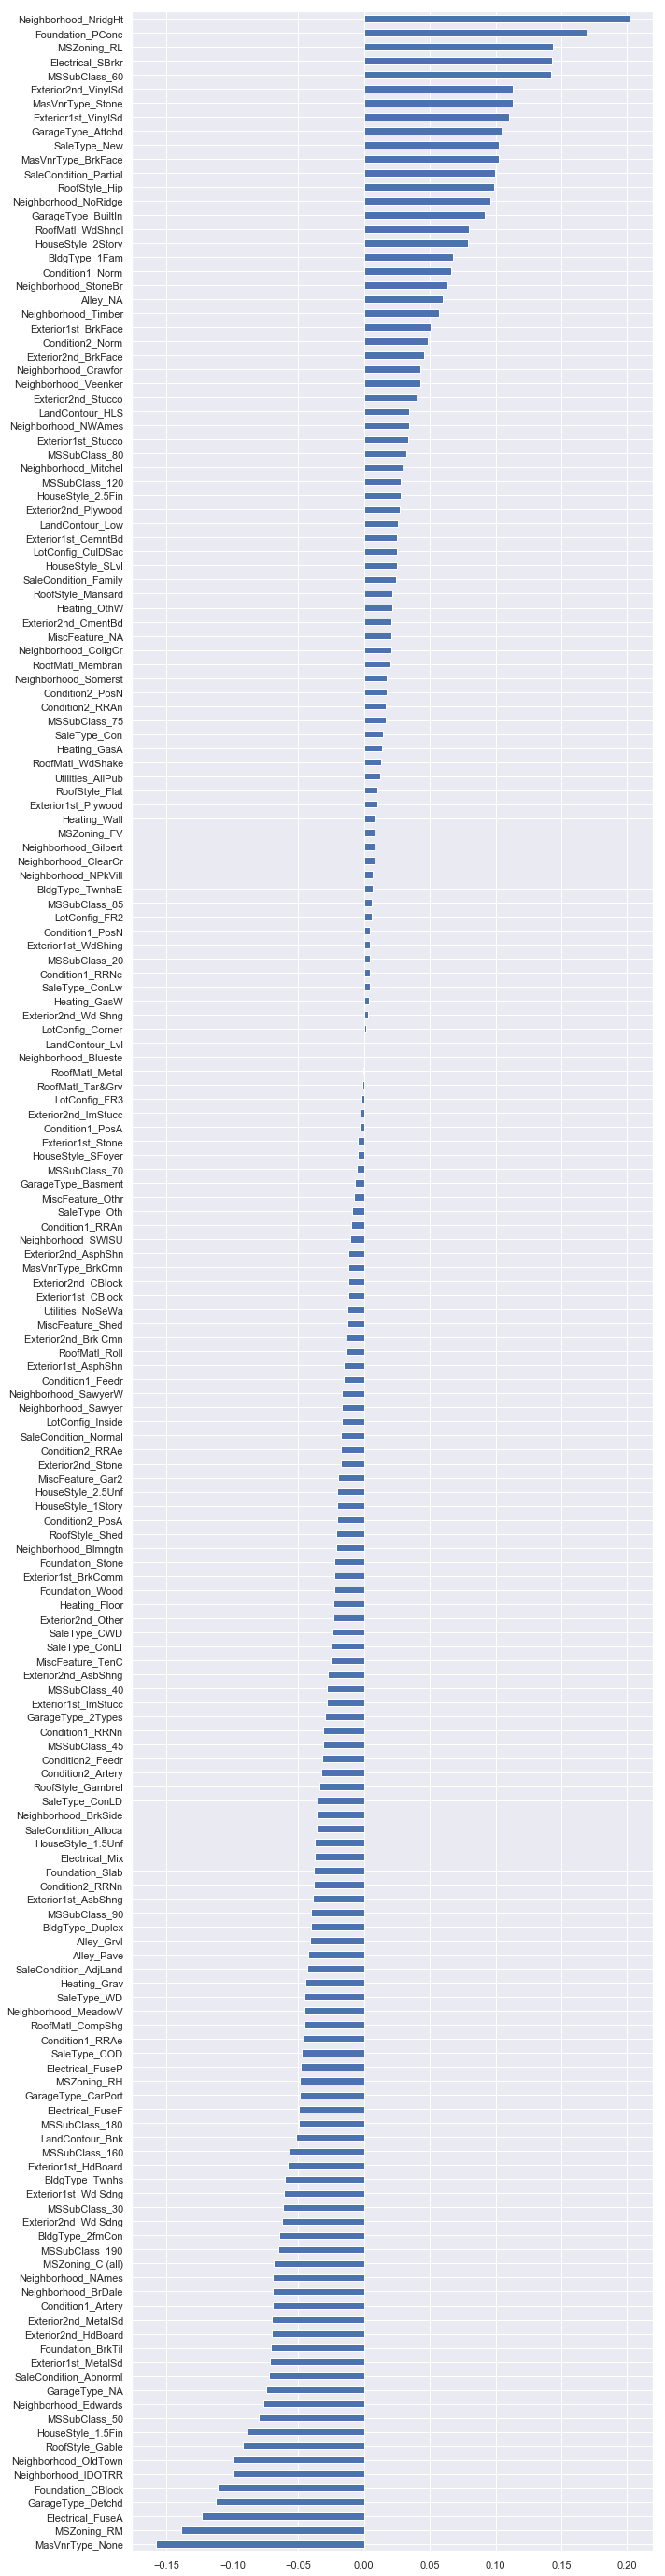

In [77]:
#Plot the correlation nominal variable vs SalePrice
df=catnomSP_cols

fig, ax = plt.subplots(figsize=(10,50))
sns.set(font_scale=1)
df.corrwith(df['SalePrice']).sort_values(ascending=True)[:-2].plot(kind='barh')

In [78]:
#Correlation nominal variable vs SalePrice
df.corrwith(df['SalePrice']).sort_values(ascending=False)[1:]

Neighborhood_NridgHt     0.202
Foundation_PConc         0.169
MSZoning_RL              0.143
Electrical_SBrkr         0.143
MSSubClass_60            0.142
Exterior2nd_VinylSd      0.113
MasVnrType_Stone         0.113
Exterior1st_VinylSd      0.110
GarageType_Attchd        0.105
SaleType_New             0.103
MasVnrType_BrkFace       0.102
SaleCondition_Partial    0.100
RoofStyle_Hip            0.099
Neighborhood_NoRidge     0.096
GarageType_BuiltIn       0.092
RoofMatl_WdShngl         0.080
HouseStyle_2Story        0.079
BldgType_1Fam            0.068
Condition1_Norm          0.066
Neighborhood_StoneBr     0.063
Alley_NA                 0.060
Neighborhood_Timber      0.057
Exterior1st_BrkFace      0.050
Condition2_Norm          0.049
Exterior2nd_BrkFace      0.046
Neighborhood_Crawfor     0.043
Neighborhood_Veenker     0.043
Exterior2nd_Stucco       0.040
LandContour_HLS          0.034
Neighborhood_NWAmes      0.034
Exterior1st_Stucco       0.034
MSSubClass_80            0.032
Neighbor

In [79]:
train_test.head()

LotFrontage  LotArea  Street  LotShape  LandSlope  OverallQual  \
0       65.000     8450       1         4          3            7   
1       80.000     9600       1         4          3            6   
2       68.000    11250       1         3          3            7   
3       60.000     9550       1         3          3            7   
4       84.000    14260       1         3          3            8   

   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  \
0            5          8             8     196.000          4          3   
1            8         35            35       0.000          3          3   
2            5         10             9     162.000          4          3   
3            5         96            41       0.000          3          3   
4            5         11            11     350.000          4          3   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0         4         3             1             6     706.000             1   
1         4         3             4             5     978.000             1   
2         4         3             2             6     486.000             1   
3         3         4             1             5     216.000             1   
4         4         3             3             6     655.000             1   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  FstFlrSF  \
0       0.000    150.000      856.000          5           1       856   
1       0.000    284.000     1262.000          5           1      1262   
2       0.000    434.000      920.000          5           1       920   
3       0.000    540.000      756.000          4           1       961   
4       0.000    490.000     1145.000          5           1      1145   

   SndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710         1.000         0.000         2   
1         0             0       1262         0.000         1.000         2   
2       866             0       1786         1.000         0.000         2   
3       756             0       1717         1.000         0.000         1   
4      1053             0       2198         1.000         0.000         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1             3             1            4             8   
1         0             3             1            3             6   
2         1             3             1            4             6   
3         0             3             1            4             7   
4         1             4             1            4             9   

   Functional  Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
0           7           0            0        8.000             2       2.000   
1           7           1            3       35.000             2       2.000   
2           7           1            3       10.000             2       2.000   
3           7           1            4       13.000             1       3.000   
4           7           1            3       11.000             2       3.000   

   GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0     548.000           3           3           3           0           61   
1     460.000           3           3           3         298            0   
2     608.000           3           3           3           0           42   
3     642.000           3           3           3           0           35   
4     836.000           3           3           3         192           84   

   EnclosedPorch  TSsnPorch  ScreenPorch  PoolArea  PoolQC  Fence  MiscVal  \
0              0          0            0         0       0      1        0   
1              0          0            0         0       0      1        0   
2              0          0            0         0       0      1        0   
3            272          0            0       

In [80]:
catnom_ind=df.corrwith(train['SalePrice']).sort_values(ascending=False).index[1:]
df[catnom_ind].shape

(1460, 182)

In [81]:
train_test.isnull().sum().sum()

0

In [82]:
train_test.dtypes

LotFrontage              float64
LotArea                    int64
Street                     int64
LotShape                   int64
LandSlope                  int64
OverallQual                int64
OverallCond                int64
YearBuilt                  int64
YearRemodAdd               int64
MasVnrArea               float64
ExterQual                  int64
ExterCond                  int64
BsmtQual                   int64
BsmtCond                   int64
BsmtExposure               int64
BsmtFinType1               int64
BsmtFinSF1               float64
BsmtFinType2               int64
BsmtFinSF2               float64
BsmtUnfSF                float64
TotalBsmtSF              float64
HeatingQC                  int64
CentralAir                 int64
FstFlrSF                   int64
SndFlrSF                   int64
LowQualFinSF               int64
GrLivArea                  int64
BsmtFullBath             float64
BsmtHalfBath             float64
FullBath                   int64
HalfBath  

In [83]:
train_test.shape

(2917, 252)

In [84]:
# Save to csv

train_test.to_csv (r'./data/train_testEDA.csv',index = None, header=True)